In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('zomato.csv',encoding='latin-1')

In [5]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [7]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [10]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [17]:
df_country = pd.read_excel('Country-Code.xlsx')

In [19]:
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [20]:
final_df = pd.merge(df,df_country,on='Country Code',how='left')

In [22]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [30]:
country_name = final_df['Country'].value_counts().index
country_count = final_df['Country'].value_counts().values

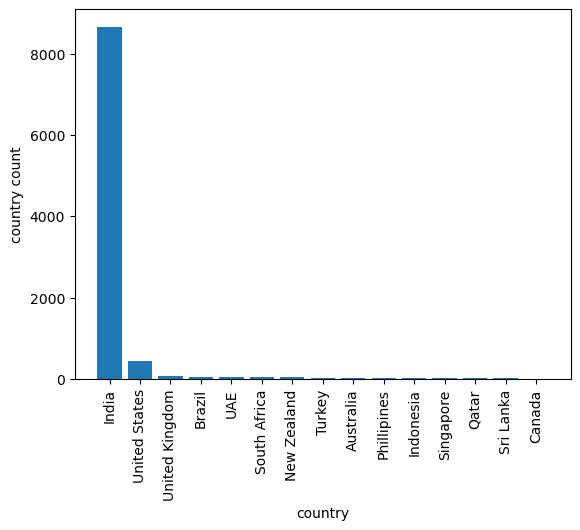

In [43]:
plt.bar(x =country_name,height= country_count)
plt.xticks(rotation=90)
plt.xlabel('country')
plt.ylabel('country count')
plt.show()

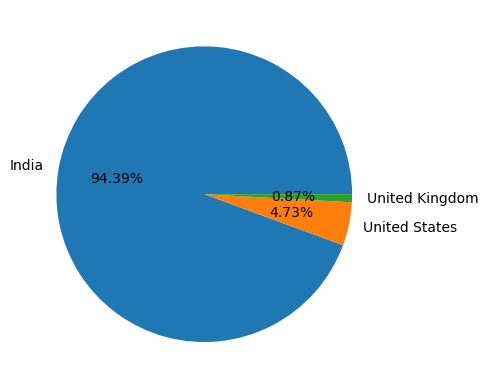

In [53]:
plt.pie(country_count[0:3],labels=country_name[0:3] , autopct='%1.2f%%')
plt.show()

observation:- most of zomato users are from india after that USA and UK

In [61]:
rating = final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index()

In [71]:
rating.rename(columns={0:'counts'}, inplace=True)

In [74]:
rating.head()

,Aggregate rating,Rating color,Rating text,counts
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


<Axes: xlabel='Aggregate rating', ylabel='counts'>

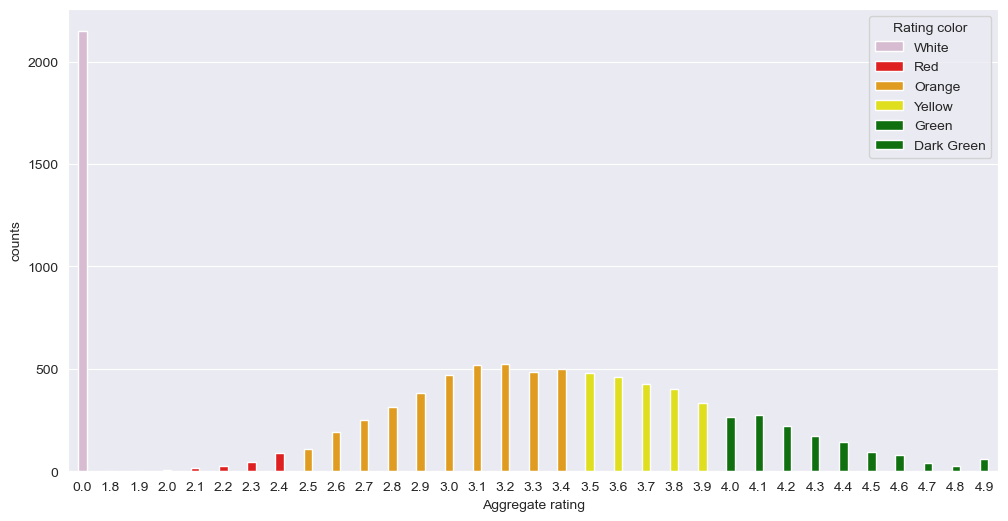

In [99]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
sns.barplot(data = rating, x ='Aggregate rating',y='counts',hue='Rating color',palette=['#dbb8d3','red','orange','yellow','green','green'] , width=0.3)

observation:- 
1.most of the people do not rate food.
2.maximum number of rating is between 2.5 to 3.9

__find the countries name that has given 0 rating__

In [113]:
rating_by_country = final_df.groupby(['Aggregate rating','Country']).size().reset_index()

In [116]:
rating_by_country[rating_by_country['Aggregate rating'] == 0.0]

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3


observation
1.maximum number of 0 ratings has given by indian customers

__find out which currency is used by which country__

In [119]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [124]:
Currency_table = final_df.groupby(['Currency','Country']).size().reset_index()

In [128]:
Currency_table[['Currency','Country']]

,Currency,Country
0,Botswana Pula(P),Phillipines
1,Brazilian Real(R$),Brazil
2,Dollar($),Australia
3,Dollar($),Canada
4,Dollar($),Singapore
5,Dollar($),United States
6,Emirati Diram(AED),UAE
7,Indian Rupees(Rs.),India
8,Indonesian Rupiah(IDR),Indonesia
9,NewZealand($),New Zealand


__which countries have online deliveries option__

In [144]:
online = final_df[final_df['Has Online delivery'] == 'Yes'] 

In [148]:
online.groupby(['Country']).size().reset_index()

,Country,0
0,India,2423
1,UAE,28


__pie chart for cities distribution__

In [157]:
demo = final_df['City'].value_counts().head().reset_index()
demo

,City,count
0,New Delhi,5473
1,Gurgaon,1118
2,Noida,1080
3,Faridabad,251
4,Ghaziabad,25


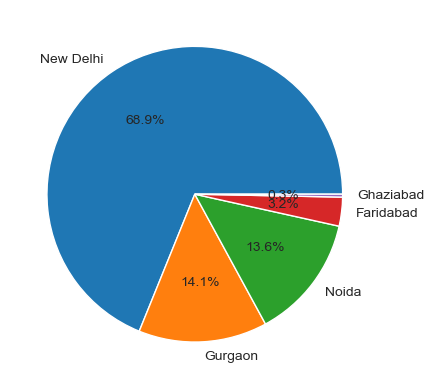

In [167]:
plt.pie(demo['count'],labels=demo['City'],autopct='%0.1f%%')
plt.show()

__find top 10 cuisines__

In [174]:
final_df['Cuisines'].value_counts().head(10).reset_index()

,Cuisines,count
0,North Indian,936
1,"North Indian, Chinese",511
2,Chinese,354
3,Fast Food,354
4,"North Indian, Mughlai",334
5,Cafe,299
6,Bakery,218
7,"North Indian, Mughlai, Chinese",197
8,"Bakery, Desserts",170
9,Street Food,149
